<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Этап 1. Выбор и обработка исходных данных. Разделение на обучающую и тестовую выборку

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!pip install patchify

!pip install tensorflow==2.9.0
!pip install -U -q segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image

tf.compat.v1.enable_eager_execution()
import segmentation_models as sm
from keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

import splitfolders

In [49]:
root_directory = '/content/drive/MyDrive/Semantic segmentation dataset'

patch_size = 256

In [50]:
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   
        images = os.listdir(path)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   
                image = cv2.imread(path+"/"+image_name, 1)  
                SIZE_X = (image.shape[1]//patch_size)*patch_size 
                SIZE_Y = (image.shape[0]//patch_size)*patch_size  
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  
                image = np.array(image)             
       
                # Разделяем изображение на части
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        single_patch_img = single_patch_img[0] # Убираем лишние ненужные каналы, которые добавляет patchify.                              
                        # image_dataset.append(single_patch_img)
          
                        cv2.imwrite(root_directory+"/Data/Image/" + image_name + 
                                   "_patch_" + str(i) + str(j) + ".jpg", single_patch_img)
                        
                        print(root_directory + "/Data/Image/" + image_name + 
                                   "_patch_" + str(i) + str(j) + ".jpg")

/content/drive/MyDrive/Semantic segmentation dataset
/content/drive/MyDrive/Semantic segmentation dataset/Tile 4
/content/drive/MyDrive/Semantic segmentation dataset/Tile 4/images
Now patchifying image: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/images/image_part_004.jpg
/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/image_part_004.jpg_patch_00.jpg
/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/image_part_004.jpg_patch_01.jpg
/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/image_part_004.jpg_patch_02.jpg
/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/image_part_004.jpg_patch_03.jpg
/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/image_part_004.jpg_patch_10.jpg
/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/image_part_004.jpg_patch_11.jpg
/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/image_part_004.jpg_patch_12.jpg
/content/drive/MyDrive/Semantic segment

In [51]:
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks': 
        masks = os.listdir(path)  
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):  
               
                mask = cv2.imread(path+"/"+mask_name, 1)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))
                mask = np.array(mask)             
       
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        single_patch_mask = single_patch_mask[0]                               

                        cv2.imwrite(root_directory+"/Data/Masks/" + mask_name + 
                                   "_patch_" + str(i) + str(j) + ".png", single_patch_mask)
 


/content/drive/MyDrive/Semantic segmentation dataset
/content/drive/MyDrive/Semantic segmentation dataset/Tile 4
/content/drive/MyDrive/Semantic segmentation dataset/Tile 4/images
/content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks/image_part_009.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks/image_part_008.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks/image_part_005.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks/image_part_004.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks/image_part_001.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks/image_part_003.png
Now patchifying mask: /content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks/image_part_007.png
Now p

In [62]:
train_img_dir = r'/content/drive/MyDrive/Semantic segmentation dataset/Data/Image/'
train_mask_dir = r'/content/drive/MyDrive/Semantic segmentation dataset/Data/Masks/'

In [63]:
img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

print(img_list, msk_list)

print(len(img_list), len(msk_list))

['image_part_001.jpg_patch_00.jpg', 'image_part_001.jpg_patch_01.jpg', 'image_part_001.jpg_patch_02.jpg', 'image_part_001.jpg_patch_03.jpg', 'image_part_001.jpg_patch_04.jpg', 'image_part_001.jpg_patch_05.jpg', 'image_part_001.jpg_patch_06.jpg', 'image_part_001.jpg_patch_07.jpg', 'image_part_001.jpg_patch_10.jpg', 'image_part_001.jpg_patch_11.jpg', 'image_part_001.jpg_patch_12.jpg', 'image_part_001.jpg_patch_13.jpg', 'image_part_001.jpg_patch_14.jpg', 'image_part_001.jpg_patch_15.jpg', 'image_part_001.jpg_patch_16.jpg', 'image_part_001.jpg_patch_17.jpg', 'image_part_001.jpg_patch_20.jpg', 'image_part_001.jpg_patch_21.jpg', 'image_part_001.jpg_patch_22.jpg', 'image_part_001.jpg_patch_23.jpg', 'image_part_001.jpg_patch_24.jpg', 'image_part_001.jpg_patch_25.jpg', 'image_part_001.jpg_patch_26.jpg', 'image_part_001.jpg_patch_27.jpg', 'image_part_001.jpg_patch_30.jpg', 'image_part_001.jpg_patch_31.jpg', 'image_part_001.jpg_patch_32.jpg', 'image_part_001.jpg_patch_33.jpg', 'image_part_001.jpg

<Figure size 1200x800 with 0 Axes>

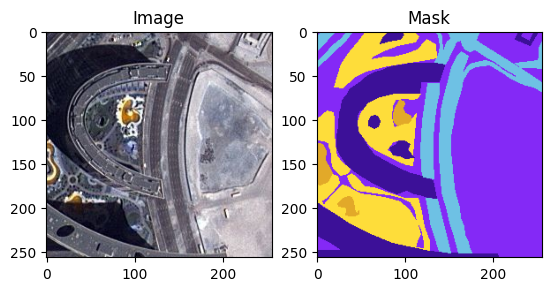

<Figure size 1200x800 with 0 Axes>

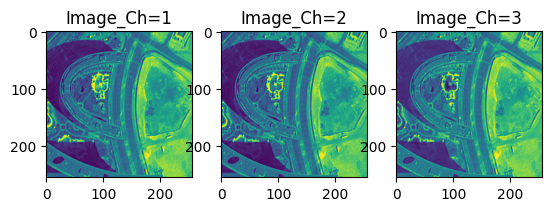

<Figure size 1200x800 with 0 Axes>

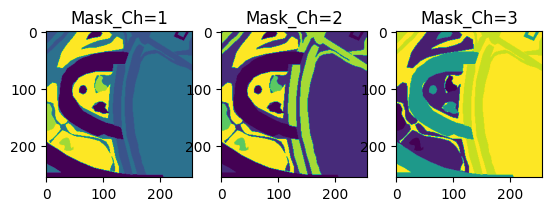

In [65]:
import random

img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num])

img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(train_mask_dir+msk_list[img_num])
mask_for_plot = cv2.cvtColor(mask_for_plot, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 2)

axis[0].imshow(img_for_plot, cmap=plt.get_cmap('gray'),vmin=0,vmax=100)
axis[0].set_title('Image')

axis[1].imshow(mask_for_plot)
axis[1].set_title('Mask')

plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(img_for_plot[:,:,0])
axis[0].set_title('Image_Ch=1')

axis[1].imshow(img_for_plot[:,:,1])
axis[1].set_title('Image_Ch=2')

axis[2].imshow(img_for_plot[:,:,2])
axis[2].set_title('Image_Ch=3')

# Combine all the operations and display
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(mask_for_plot[:,:,0])
axis[0].set_title("Mask_Ch=1")

axis[1].imshow(mask_for_plot[:,:,1])
axis[1].set_title("Mask_Ch=2")

axis[2].imshow(mask_for_plot[:,:,2])
axis[2].set_title("Mask_Ch=3")

plt.show()

In [66]:
input_folder = r'/content/drive/MyDrive/Semantic segmentation dataset/Data/'
output_folder = r'/content/drive/MyDrive/Semantic segmentation dataset/output/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

Copying files: 1098 files [00:11, 94.78 files/s] 


Этап 2. Предобработка обучающей выборки. Разработка архитектуры модели

In [68]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

In [69]:
def rgb_to_2D_label(label):
    """
    Замена значений каждого пикселя маски в формате RGB на целое число 
    
    """

    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5

    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

def preprocess_data(img, mask, num_class):
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img) 
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)


In [91]:
seed=24
batch_size= 16
num_classes=6

In [161]:
from keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    print(train_img_path)
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [168]:
train_img_path = r'/content/drive/MyDrive/Semantic segmentation dataset/output/train/Image/'
train_mask_path = r'/content/drive/MyDrive/Semantic segmentation dataset/output/train/Masks/'

train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=6)


val_img_path = r'/content/drive/MyDrive/Semantic segmentation dataset/output/val/Image/'
val_mask_path = r'/content/drive/MyDrive/Semantic segmentation dataset/output/val/Masks/'

val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)

In [169]:
x, y = train_img_gen.__next__()

for i in range(0,3):
    image = x[i][:,:,0]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.show()

x_val, y_val = val_img_gen.__next__()

for i in range(0,3):
    image = x_val[i][:,:,0]
    mask = np.argmax(y_val[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.show()

labels, count = np.unique(mask, return_counts=True) #Check for each channel. All chanels are identical

print("Unique labels in label dataset are: ", np.unique(labels))

/content/drive/MyDrive/Semantic segmentation dataset/output/train/Image/
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: ignored